In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt 
INPUT_FOLDER = "/mnt/d/Spring 2023 Big Files/"
OUTPUT_FOLDER = "/mnt/d/Spring 2023 Big Files"

In [ ]:
def load_yelp_orig_data(path):
    if os.path.exists(path):
        return
    PATH_TO_YELP_REVIEWS = os.path.join(INPUT_FOLDER,"output.json")

    # read the entire file into a python array
    with open(PATH_TO_YELP_REVIEWS, 'r') as f:
        data = f.readlines()

    # remove the trailing "\n" from each line
    data = map(lambda x: x.rstrip(), data)

    data_json_str = "[" , ','.join(data) , "]"

    # now, load it into pandas
    data_df = pd.read_json(data_json_str)

    data_df.head(100000).to_csv(path)

load_yelp_orig_data(path = os.path.join(OUTPUT_FOLDER, 'output_reviews_top.csv'))

In [ ]:
top_data_df = pd.read_csv(os.path.join(INPUT_FOLDER , 'output_reviews_top.csv'))
print("Columns in the original dataset:\n")
print(top_data_df.columns)


Columns in the original dataset:

Index(['Unnamed: 0', 'review_id', 'user_id', 'business_id', 'stars', 'useful',
       'funny', 'cool', 'text', 'date'],
      dtype='object')


Number of rows per star rating:
5    44392
4    25337
3    11362
1    10921
2     7988
Name: stars, dtype: int64


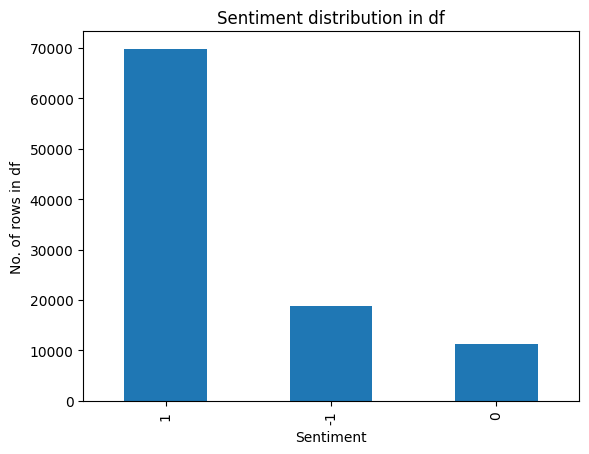

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,sentiment
0,0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,0
1,1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,1
2,2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,0
3,3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,1
4,4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,1


In [ ]:


print("Number of rows per star rating:")
print(top_data_df['stars'].value_counts())

# Function to map stars to sentiment
def map_sentiment(stars_received):
    if stars_received <= 2:
        return -1
    elif stars_received == 3:
        return 0
    else:
        return 1
# Mapping stars to sentiment into three categories
top_data_df['sentiment'] = [ map_sentiment(x) for x in top_data_df['stars']]
# Plotting the sentiment distribution
plt.figure()
pd.value_counts(top_data_df['sentiment']).plot.bar(title="Sentiment distribution in df")
plt.xlabel("Sentiment")
plt.ylabel("No. of rows in df")
plt.show()
top_data_df.head()

In [ ]:
# Function to retrieve top few number of each category
def get_top_data(top_n = 5000):
    top_data_df_positive = top_data_df[top_data_df['sentiment'] == 1].head(top_n)
    top_data_df_negative = top_data_df[top_data_df['sentiment'] == -1].head(top_n)
    top_data_df_neutral = top_data_df[top_data_df['sentiment'] == 0].head(top_n)
    top_data_df_small = pd.concat([top_data_df_positive, top_data_df_negative, top_data_df_neutral])
    return top_data_df_small

# Function call to get the top 10000 from each sentiment
top_data_df_small = get_top_data(top_n=10000)

# After selecting top few samples of each sentiment
print("After segregating and taking equal number of rows for each sentiment:")
print(top_data_df_small['sentiment'].value_counts())
top_data_df_small.head(10)

After segregating and taking equal number of rows for each sentiment:
 1    10000
-1    10000
 0    10000
Name: sentiment, dtype: int64


,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,sentiment
1,1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,1
3,3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,1
4,4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,1
6,6,6AxgBCNX_PNTOxmbRSwcKQ,r3zeYsv1XFBRA4dJpL78cw,gmjsEdUsKpj9Xxu6pdjH0g,5,0,2,0,Loved this tour! I grabbed a groupon and the p...,2015-01-03 23:21:18,1
7,7,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5,2,0,0,Amazingly amazing wings and homemade bleu chee...,2015-08-07 02:29:16,1
10,10,rGQRf8UafX7OTlMNN19I8A,1WHRWwQmZOZDAhp2Qyny4g,uMvVYRgGNXf5boolA9HXTw,5,2,0,0,My experience with Shalimar was nothing but wo...,2015-06-21 14:48:06,1
11,11,l3Wk_mvAog6XANIuGQ9C7Q,ZbqSHbgCjzVAqaa7NKWn5A,EQ-TZ2eeD_E0BHuvoaeG5Q,4,0,0,0,"Locals recommended Milktooth, and it's an amaz...",2015-08-19 14:31:45,1
12,12,XW_LfMv0fV21l9c6xQd_lw,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,4,0,0,0,Love going here for happy hour or dinner! Gre...,2014-06-27 22:44:01,1
13,13,8JFGBuHMoiNDyfcxuWNtrA,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4,0,0,0,Good food--loved the gnocchi with marinara\nth...,2009-10-14 19:57:14,1
14,14,UBp0zWyH60Hmw6Fsasei7w,4Uh27DgGzsp6PqrH913giQ,otQS34_MymijPTdNBoBdCw,4,0,2,0,The bun makes the Sonoran Dog. It's like a snu...,2011-10-27 17:12:05,1


In [ ]:
from gensim.parsing.preprocessing import remove_stopwords
print(remove_stopwords("Restaurant had a really good service!!"))
print(remove_stopwords("I did not like the food!!"))
print(remove_stopwords("This product is not good!!"))

Restaurant good service!!
I like food!!
This product good!!


In [ ]:
from gensim.utils import simple_preprocess
# Tokenize the text column to get the new column 'tokenized_text'
top_data_df_small['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in top_data_df_small['text']] 
print(top_data_df_small['tokenized_text'].head(10))

1     [ve, taken, lot, of, spin, classes, over, the,...
3     [wow, yummy, different, delicious, our, favori...
4     [cute, interior, and, owner, gave, us, tour, o...
6     [loved, this, tour, grabbed, groupon, and, the...
7     [amazingly, amazing, wings, and, homemade, ble...
10    [my, experience, with, shalimar, was, nothing,...
11    [locals, recommended, milktooth, and, it, an, ...
12    [love, going, here, for, happy, hour, or, dinn...
13    [good, food, loved, the, gnocchi, with, marina...
14    [the, bun, makes, the, sonoran, dog, it, like,...
Name: tokenized_text, dtype: object


In [ ]:

from gensim.parsing.porter import PorterStemmer
porter_stemmer = PorterStemmer()
# Get the stemmed_tokens
top_data_df_small['stemmed_tokens'] = [[porter_stemmer.stem(word) for word in tokens] for tokens in top_data_df_small['tokenized_text'] ]
top_data_df_small['stemmed_tokens'].head(10)

1     [ve, taken, lot, of, spin, class, over, the, y...
3     [wow, yummi, differ, delici, our, favorit, is,...
4     [cute, interior, and, owner, gave, us, tour, o...
6     [love, thi, tour, grab, groupon, and, the, pri...
7     [amazingli, amaz, wing, and, homemad, bleu, ch...
10    [my, experi, with, shalimar, wa, noth, but, wo...
11    [local, recommend, milktooth, and, it, an, ama...
12    [love, go, here, for, happi, hour, or, dinner,...
13    [good, food, love, the, gnocchi, with, marinar...
14    [the, bun, make, the, sonoran, dog, it, like, ...
Name: stemmed_tokens, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
# Train Test Split Function
def split_train_test(top_data_df_small, test_size=0.3, shuffle_state=True):
    X_train, X_test, Y_train, Y_test = train_test_split(top_data_df_small[['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text', 'useful', 'user_id', 'stemmed_tokens']], 
                                                        top_data_df_small['sentiment'], 
                                                        shuffle=shuffle_state,
                                                        test_size=test_size, 
                                                        random_state=15)
    print("Value counts for Train sentiments")
    print(Y_train.value_counts())
    print("Value counts for Test sentiments")
    print(Y_test.value_counts())
    print(type(X_train))
    print(type(Y_train))
    X_train = X_train.reset_index()
    X_test = X_test.reset_index()
    Y_train = Y_train.to_frame()
    Y_train = Y_train.reset_index()
    Y_test = Y_test.to_frame()
    Y_test = Y_test.reset_index()
    print(X_train.head())
    return X_train, X_test, Y_train, Y_test

# Call the train_test_split
X_train, X_test, Y_train, Y_test = split_train_test(top_data_df_small)

Value counts for Train sentiments
 1    7036
-1    7008
 0    6956
Name: sentiment, dtype: int64
Value counts for Test sentiments
 0    3044
-1    2992
 1    2964
Name: sentiment, dtype: int64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
   index             business_id  cool                 date  funny  \
0  41964  h7zxeLAdUyAO6S6UzXJDwA     0  2018-05-20 02:15:46      0   
1  21237  ySXKjndttZjNy3kcqRqG3g     0  2015-12-20 20:30:12      0   
2  43742  9gObo5ltOMo6UgsaXaHPWA     0  2015-12-05 23:57:22      0   
3  35107  tvbFcYCEQWc76CUK-nBw8w     0  2018-07-27 08:09:21      0   
4   2960  Yv6HUVu7fRMnt_NtGdVQBw     0  2018-06-19 18:16:51      0   

                review_id  stars  \
0  xkcYjM_5w9rdSiN8_Qz_Tg      1   
1  XIYnB19-LAI_yzJfB2d7eQ      3   
2  Nm2XaG0sQ7p3LHoZG44cAg      1   
3  L8Ape_IoEHiMjgiufwCp8Q      3   
4  0uD1hdeUNPyfAaGOKpMMeQ      5   

                                                text  useful  \
0  Kids talking and being disru

In [ ]:

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torch
# Use cuda if present
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device available for running: ")
print(device)

Device available for running: 
cuda


In [ ]:
from gensim.models import Word2Vec
size = 500
window = 3
min_count = 1
workers = 3
sg = 1

# Function to train word2vec model
def make_word2vec_model(top_data_df_small, padding=True, sg=1, min_count=1, size=500, workers=3, window=3):
    if  padding:
        print(len(top_data_df_small))
        temp_df = pd.Series(top_data_df_small['stemmed_tokens']).values
        temp_df = list(temp_df)
        temp_df.append(['pad'])
        word2vec_file = os.path.join(OUTPUT_FOLDER,'models/', 'word2vec_' + str(size) + '_PAD.model')
    else:
        temp_df = top_data_df_small['stemmed_tokens']
        word2vec_file = os.path.join(OUTPUT_FOLDER, 'models/' ,'word2vec_' + str(size) + '.model')
    w2v_model = Word2Vec(temp_df, min_count = min_count, vector_size = size, workers = workers, window = window, sg = sg)

    w2v_model.save(word2vec_file)
    return w2v_model, word2vec_file

# Train Word2vec model
word2vec_file = os.path.join(OUTPUT_FOLDER, 'models', 'word2vec_' + str(size) + '_PAD.model')
if not os.path.exists(word2vec_file):
    if not os.path.exists(os.path.dirname(word2vec_file)):
        os.makedirs(os.path.dirname(word2vec_file))
    w2vmodel, word2vec_file = make_word2vec_model(top_data_df_small, padding=True, sg=sg, min_count=min_count, size=size, workers=workers, window=window)
else:
    w2vmodel = Word2Vec.load(word2vec_file)


In [ ]:
w2vmodel.wv.key_to_index['pad']
w2vmodel.wv.index_to_key[0]

'the'

In [78]:
max_sen_len = top_data_df_small.stemmed_tokens.map(len).max()
padding_idx = w2vmodel.wv.key_to_index['pad']
def make_word2vec_vector_cnn(sentence):
    padded_X = [padding_idx for i in range(max_sen_len)]
    i = 0
    for word in sentence:
        if word not in w2vmodel.wv.key_to_index:
            padded_X[i] = 0
            print(word)
        else:
            padded_X[i] = w2vmodel.wv.key_to_index[word]
        i += 1
    return torch.tensor(padded_X, dtype=torch.long, device=device).view(1, -1)

In [79]:

# Function to get the output tensor
def make_target(label):
    if label == -1:
        return torch.tensor([0], dtype=torch.long, device=device)
    elif label == 0:
        return torch.tensor([1], dtype=torch.long, device=device)
    else:
        return torch.tensor([2], dtype=torch.long, device=device)

In [80]:
EMBEDDING_SIZE = 500
NUM_FILTERS = 10
import gensim

class CnnTextClassifier(nn.Module):
    def __init__(self, vocab_size, num_classes, window_sizes=(1,2,3,5)):
        super(CnnTextClassifier, self).__init__()
        w2vmodel = gensim.models.KeyedVectors.load(os.path.join(OUTPUT_FOLDER, 'models/', 'word2vec_500_PAD.model'))
        weights = w2vmodel.wv
        # With pretrained embeddings
        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(weights.vectors), padding_idx=w2vmodel.wv.key_to_index['pad'])
        # Without pretrained embeddings
        # self.embedding = nn.Embedding(vocab_size, EMBEDDING_SIZE)

        self.convs = nn.ModuleList([
                                   nn.Conv2d(1, NUM_FILTERS, [window_size, EMBEDDING_SIZE], padding=(window_size - 1, 0))
                                   for window_size in window_sizes
        ])

        self.fc = nn.Linear(NUM_FILTERS * len(window_sizes), num_classes)

    def forward(self, x):
        x = self.embedding(x) # [B, T, E]

        # Apply a convolution + max_pool layer for each window size
        x = torch.unsqueeze(x, 1)
        xs = []
        for conv in self.convs:
            x2 = torch.tanh(conv(x))
            x2 = torch.squeeze(x2, -1)
            x2 = F.max_pool1d(x2, x2.size(2))
            xs.append(x2)
        x = torch.cat(xs, 2)

        # FC
        x = x.view(x.size(0), -1)
        logits = self.fc(x)

        probs = F.softmax(logits, dim = 1)

        return probs

In [ ]:
from tqdm import tqdm
NUM_CLASSES = 3
VOCAB_SIZE = len(w2vmodel.wv.index_to_key)

cnn_model = CnnTextClassifier(vocab_size=VOCAB_SIZE, num_classes=NUM_CLASSES)
cnn_model.to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)
num_epochs = 30

# Open the file for writing loss
if not os.path.exists(os.path.join(OUTPUT_FOLDER, 'plots')):
    os.makedirs(os.path.join(OUTPUT_FOLDER, 'plots'))
if not os.path.exists(os.path.join(OUTPUT_FOLDER, 'ckpts')):
    os.makedirs(os.path.join(OUTPUT_FOLDER, 'ckpts'))

loss_file_name = os.path.join(OUTPUT_FOLDER, 'plots/','cnn_class_big_loss_with_padding.csv') 
if not os.path.exists(loss_file_name):
    with open(loss_file_name,'w') as f:
        f.write('iter, loss')
        f.write('\n')
    losses = []
    cnn_model.train()
    for epoch in range(num_epochs):
        print("Epoch" + str(epoch + 1))
        train_loss = 0
        for index, row in tqdm(X_train.iterrows(), total=len(X_train)):
            print(index, row)
            # Clearing the accumulated gradients
            cnn_model.zero_grad()

            # Make the bag of words vector for stemmed tokens 
            bow_vec = make_word2vec_vector_cnn(row['stemmed_tokens'])
        
            # Forward pass to get output
            probs = cnn_model(bow_vec)

            # Get the target label
            target = make_target(Y_train['sentiment'][index])

            # Calculate Loss: softmax --> cross entropy loss
            loss = loss_function(probs, target)
            train_loss += loss.item()

            # Getting gradients w.r.t. parameters
            loss.backward()

            # Updating parameters
            optimizer.step()


        # if index == 0:
        #     continue
        print("Score: " + str((epoch+1)) + "," + str(train_loss / len(X_train)))
        with open(loss_file_name, 'a') as f:
            f.write(str((epoch+1)) + "," + str(train_loss / len(X_train)))
            f.write('\n')
        
        if epoch % 5 == 0:
            torch.save({
                'epoch': epoch,
                'model_state_dict': cnn_model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': train_loss,
                }, os.path.join(OUTPUT_FOLDER, 'ckpts', f'epoch_{epoch}.pt'))
        train_loss = 0

    torch.save(cnn_model, os.path.join(OUTPUT_FOLDER, 'cnn_big_model_500_with_padding.pth'))
    print("Input vector")
    print(bow_vec.cpu().numpy())
    print("Probs")
    print(probs)
    print(torch.argmax(probs, dim=1).cpu().numpy()[0])

In [82]:

from sklearn.metrics import classification_report
bow_cnn_predictions = []
original_lables_cnn_bow = []
cnn_model =torch.load(os.path.join(OUTPUT_FOLDER, 'cnn_big_model_500_with_padding.pth'))
cnn_model.eval()
loss_df = pd.read_csv(os.path.join(OUTPUT_FOLDER, 'plots', 'cnn_class_big_loss_with_padding.csv'))
print(loss_df.columns)
# loss_df.plot('loss')
with torch.no_grad():
    for index, row in tqdm(X_test.iterrows(), total=len(X_test)):
        bow_vec = make_word2vec_vector_cnn(row['stemmed_tokens'])
        probs = cnn_model(bow_vec)
        _, predicted = torch.max(probs.data, 1)
        bow_cnn_predictions.append(predicted.cpu().numpy()[0])
        original_lables_cnn_bow.append(make_target(Y_test['sentiment'][index]).cpu().numpy()[0])
print(classification_report(original_lables_cnn_bow,bow_cnn_predictions))
# loss_file_name = os.path.join(OUTPUT_FOLDER ,  'plots/' , 'cnn_class_big_loss_with_padding.csv')
# loss_df = pd.read_csv(loss_file_name)
# print(loss_df.columns)
# plt_500_padding_30_epochs = loss_df[' loss'].plot()
# fig = plt_500_padding_30_epochs.get_figure()
# fig.savefig(os.path.join(OUTPUT_FOLDER ,'plots/' , "loss_plt_500_padding_30_epochs.png"))

Index(['iter', ' loss'], dtype='object')


100%|██████████| 9000/9000 [00:12<00:00, 704.93it/s]

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      2992
           1       0.62      0.63      0.63      3044
           2       0.77      0.78      0.78      2964

    accuracy                           0.72      9000
   macro avg       0.72      0.72      0.72      9000
weighted avg       0.72      0.72      0.72      9000



In [85]:
class SentimentLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super().__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        w2vmodel = gensim.models.KeyedVectors.load(os.path.join(OUTPUT_FOLDER, 'models/', 'word2vec_500_PAD.model'))
        weights = w2vmodel.wv
        # With pretrained embeddings
        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(weights.vectors), padding_idx=w2vmodel.wv.key_to_index['pad'])
        # embedding and LSTM layers
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size, train_on_gpu=True):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

In [ ]:
from tqdm import tqdm
NUM_CLASSES = 3
VOCAB_SIZE = len(w2vmodel.wv.index_to_key)

lstm_model = SentimentLSTM(vocab_size=VOCAB_SIZE, output_size=NUM_CLASSES, embedding_dim=EMBEDDING_SIZE, hidden_dim = 256, n_layers=2)
lstm_model.to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(lstm_model.parameters(), lr=0.001)
num_epochs = 5

# Open the file for writing loss
if not os.path.exists(os.path.join(OUTPUT_FOLDER, 'lstm', 'plots')):
    os.makedirs(os.path.join(OUTPUT_FOLDER, 'lstm', 'plots'))
if not os.path.exists(os.path.join(OUTPUT_FOLDER, 'lstm', 'ckpts')):
    os.makedirs(os.path.join(OUTPUT_FOLDER, 'lstm', 'ckpts'))

loss_file_name = os.path.join(OUTPUT_FOLDER, 'lstm', 'plots/','lstm_class_big_loss_with_padding.csv') 
with open(loss_file_name,'w') as f:
    f.write('iter, loss')
    f.write('\n')
losses = []
lstm_model.train()
batch_size = 1 #len(X_train)
for epoch in range(num_epochs):
    print("Epoch" + str(epoch + 1))
    train_loss = 0
    h = lstm_model.init_hidden(batch_size)
    for index, row in tqdm(X_train.iterrows(), total=len(X_train)):
        # Clearing the accumulated gradients
        lstm_model.zero_grad()

        # Make the bag of words vector for stemmed tokens 
        bow_vec = make_word2vec_vector_cnn(row['stemmed_tokens'])
        
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])
       
        # Forward pass to get output
        probs, h = lstm_model(bow_vec, h)

        # Get the target label
        target = make_target(Y_train['sentiment'][index])

        # Calculate Loss: softmax --> cross entropy loss
        loss = loss_function(probs, target.float())
        train_loss += loss.item()

        # Getting gradients w.r.t. parameters
        nn.utils.clip_grad_norm_(lstm_model.parameters(), 5)
        loss.backward()

        # Updating parameters
        optimizer.step()


    # if index == 0:
    #     continue
    print("Score: " + str((epoch+1)) + "," + str(train_loss / len(X_train)))
    with open(loss_file_name, 'a') as f:
        f.write(str((epoch+1)) + "," + str(train_loss / len(X_train)))
        f.write('\n')
    
    if epoch % 1 == 0:
        torch.save({
            'epoch': epoch,
            'model_state_dict': cnn_model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': train_loss,
            }, os.path.join(OUTPUT_FOLDER, 'lstm', 'ckpts', f'epoch_{epoch}.pt'))
    train_loss = 0

torch.save(lstm_model, os.path.join(OUTPUT_FOLDER, 'lstm', 'lstm_big_model_500_with_padding.pth'))
print("Input vector")
print(bow_vec.cpu().numpy())
print("Probs")
print(probs)
print(torch.argmax(probs, dim=1).cpu().numpy()[0])

Epoch1


100%|██████████| 21000/21000 [22:40<00:00, 15.44it/s]


Score: 1,0.0
Epoch2


100%|██████████| 21000/21000 [22:41<00:00, 15.42it/s]


Score: 2,0.0
Epoch3


100%|██████████| 21000/21000 [22:08<00:00, 15.80it/s]


Score: 3,0.0
Epoch4


100%|██████████| 21000/21000 [21:51<00:00, 16.01it/s]


Score: 4,0.0
Epoch5


100%|██████████| 21000/21000 [21:51<00:00, 16.02it/s]


Score: 5,0.0
Input vector
[[  34  288 2478    1  175   22    7  201    1  248   86  188   12   78
   997  272 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113
  1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113
  1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113
  1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113
  1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113
  1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113
  1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113
  1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113
  1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113
  1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113
  1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113
  1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113 1113
  1113 1113 1113 1113 1113 1113 1113 1

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [ ]:
from sklearn.metrics import classification_report
bow_lstm_predictions = []
original_lables_lstm_bow = []
lstm_model = torch.load(os.path.join(OUTPUT_FOLDER, 'lstm', 'lstm_big_model_500_with_padding.pth'))
lstm_model.eval()
loss_df = pd.read_csv(os.path.join(OUTPUT_FOLDER, 'lstm', 'plots', 'lstm_class_big_loss_with_padding.csv'))
print(loss_df.columns)
# loss_df.plot('loss')
batch_size=1
h = lstm_model.init_hidden(batch_size)
with torch.no_grad():
    for index, row in tqdm(X_test.iterrows(), total=len(X_test)):
        bow_vec = make_word2vec_vector_cnn(row['stemmed_tokens'])
        h = tuple([each.data for each in h])
        probs, h = lstm_model(bow_vec, h)
        # _, predicted = torch.max(probs.data, 1)
        bow_lstm_predictions.append(probs.cpu().numpy()[0])
        original_lables_lstm_bow.append(make_target(Y_test['sentiment'][index]).cpu().numpy()[0])


In [89]:
print(classification_report(original_lables_lstm_bow,list(map(round,bow_lstm_predictions))))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2992
           1       0.34      1.00      0.51      3044
           2       0.00      0.00      0.00      2964

    accuracy                           0.34      9000
   macro avg       0.11      0.33      0.17      9000
weighted avg       0.11      0.34      0.17      9000



/home/parker-alien/miniconda3/envs/torch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/parker-alien/miniconda3/envs/torch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/parker-alien/miniconda3/envs/torch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [ ]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
# Define a custom dataset class that inherits from PyTorch's Dataset class
class MyDataset(Dataset):
    def __init__(self, X, Y):
        self.data_x = X
        self.data_y = Y

    def __len__(self):
        return len(self.data_x)

    def __getitem__(self, index):
        def make_target_lstm(label):
            if label == -1:
                return 0
            elif label == 0:
                return 1
            else:
                return 2
        max_sen_len = top_data_df_small.stemmed_tokens.map(len).max()
        padding_idx = w2vmodel.wv.key_to_index['pad']
        def make_word2vec_vector_lstm(sentence):
            padded_X = [padding_idx for i in range(max_sen_len)]
            i = 0
            for word in sentence:
                if word not in w2vmodel.wv.key_to_index:
                    padded_X[i] = 0
                    print(word)
                else:
                    padded_X[i] = w2vmodel.wv.key_to_index[word]
                i += 1
            return np.array(padded_X)
        x = self.data_x.iloc[index, self.data_x.columns.get_loc('stemmed_tokens')]
        y = self.data_y.iloc[index, self.data_y.columns.get_loc("sentiment")]
        return make_word2vec_vector_lstm(x), make_target_lstm(y)


In [97]:
from torch.autograd import Variable
import torch
class EmbeddingLSTM(nn.Module):
    """ LSTM Model that learns its own character embeddings. Max index 256 hardcoded. """

    def __init__(self, **kwargs):
        """
        Initalize new EmbeddingLSTM model.
        :keyword hidden_size: number of hidden units.
        :keyword num_layers: number of LSTM layers.
        :keyword embedding_dim: Dimensionality of the embeddings.
        """
        super().__init__()
        self.hidden_size = kwargs["hidden_size"]
        self.num_layers = kwargs["num_layers"]
        self.output_size = kwargs["output_size"]
        self.embedding_dim = kwargs["embedding_dim"]
        self.input_size = kwargs['input_size']
        w2vmodel = gensim.models.KeyedVectors.load(os.path.join(OUTPUT_FOLDER, 'models/', 'word2vec_500_PAD.model'))
        weights = w2vmodel.wv
        # With pretrained embeddings
        # self.char_embeddings = nn.Embedding.from_pretrained(torch.FloatTensor(weights.vectors), padding_idx=w2vmodel.wv.key_to_index['pad']).cuda()
        self.char_embeddings = nn.Embedding(self.input_size,  embedding_dim=self.embedding_dim)
        self.lstm = nn.LSTM(self.embedding_dim, hidden_size=self.hidden_size, num_layers=self.num_layers)
        self.output_layer = nn.Linear(self.hidden_size, self.output_size)
        self.dropout = nn.Dropout(0.7)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(self.hidden_size, self.output_size)


    def forward(self, sequence):
        lengths= len(sequence)
        embeds = self.char_embeddings(sequence.cuda())

        
        self.h0 = Variable(torch.cuda.FloatTensor(self.num_layers, lengths, self.hidden_size).fill_(0.))
        self.c0 = Variable(torch.cuda.FloatTensor(self.num_layers, lengths, self.hidden_size).fill_(0.))
        output, hn = self.lstm(embeds.permute(1, 0, 2), (self.h0, self.c0))
        lstm_out = output.contiguous().view(-1, self.hidden_size)
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        # reshape to be batch_size first
        sig_out = out.view(lengths, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return torch.round(sig_out)

    def get_name(self):
        return "EmbeddingLSTM_h{}_l{}_i{}_e{}".format(self.hidden_size, self.num_layers, self.input_size)

In [98]:
from tqdm import tqdm
import time
NUM_CLASSES = 3
VOCAB_SIZE = len(w2vmodel.wv.index_to_key)

lstm_model = EmbeddingLSTM(input_size=VOCAB_SIZE, output_size=NUM_CLASSES, hidden_size = 256, num_layers=2, embedding_dim=EMBEDDING_SIZE)
lstm_model.to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(lstm_model.parameters(), lr=0.001)
num_epochs = 30
dataset = MyDataset(X_train, Y_train)

# Define the batch size you want to use for training
batch_size = 32

# Use DataLoader to create batches
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


# Open the file for writing loss
model_name = 'lstm3'
if not os.path.exists(os.path.join(OUTPUT_FOLDER, model_name, 'plots')):
    os.makedirs(os.path.join(OUTPUT_FOLDER, model_name, 'plots'))
if not os.path.exists(os.path.join(OUTPUT_FOLDER, model_name, 'ckpts')):
    os.makedirs(os.path.join(OUTPUT_FOLDER, model_name, 'ckpts'))

loss_file_name = os.path.join(OUTPUT_FOLDER, model_name, 'plots/',f'{model_name}_class_big_loss_with_padding.csv') 
if os.path.exists(loss_file_name):
    with open(loss_file_name,'w') as f:
        f.write('iter, loss')
        f.write('\n')
    lstm_model.train()
    lstm_model.cuda()
    for epoch in tqdm(range(num_epochs)):
        print("Epoch" + str(epoch + 1))
        
        prev_time = time.time()
        start_time = time.time()
        for i, batch in enumerate(dataloader):
            
            cur_time = time.time()
            print(i, cur_time-prev_time, end ='\r')
            x_batch, y_batch = batch
            x_batch.to(torch.device('cuda'))
            y_batch.to(torch.device('cuda'))
            # Clearing the accumulated gradients
            lstm_model.zero_grad()

            # Make the bag of words vector for stemmed tokens 
        
            # Forward pass to get output
            probs = lstm_model(x_batch)
            # Calculate Loss: softmax --> cross entropy loss
            loss = loss_function(probs, y_batch.float().cuda())
            # Getting gradients w.r.t. parameters
            loss.backward()

            # Updating parameters
            optimizer.step()
            prev_time =cur_time
        print(start_time - time.time())

        # if index == 0:
        #     continue
        print("Score: " + str((epoch+1)) + "," + str(loss / len(X_train)))
        with open(loss_file_name, 'a') as f:
            f.write(str((epoch+1)) + "," + str(loss / len(X_train)))
            f.write('\n')
        
        if epoch % 1 == 0:
            torch.save({
                'epoch': epoch,
                'model_state_dict': cnn_model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': loss.item(),
                }, os.path.join(OUTPUT_FOLDER, model_name, 'ckpts', f'epoch_{epoch}.pt'))

    torch.save(lstm_model, os.path.join(OUTPUT_FOLDER, model_name, f'{model_name}_big_model_500_with_padding.pth'))
    

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch1
-150.637804746627822559
Score: 1,tensor(0.0009, device='cuda:0', grad_fn=<DivBackward0>)


  3%|▎         | 1/30 [02:30<1:12:56, 150.91s/it]

Epoch2
-152.264958858493291016
Score: 2,tensor(0.0011, device='cuda:0', grad_fn=<DivBackward0>)


  7%|▋         | 2/30 [05:03<1:10:52, 151.86s/it]

Epoch3
-151.374551534652790625
Score: 3,tensor(0.0009, device='cuda:0', grad_fn=<DivBackward0>)


 10%|█         | 3/30 [07:35<1:08:17, 151.76s/it]

Epoch4
-150.336386680603031152
Score: 4,tensor(0.0004, device='cuda:0', grad_fn=<DivBackward0>)


 13%|█▎        | 4/30 [10:05<1:05:33, 151.30s/it]

Epoch5
-149.951744318008423775
Score: 5,tensor(0.0010, device='cuda:0', grad_fn=<DivBackward0>)


 17%|█▋        | 5/30 [12:35<1:02:52, 150.91s/it]

Epoch6
-149.812263011932375586
Score: 6,tensor(0.0009, device='cuda:0', grad_fn=<DivBackward0>)


 20%|██        | 6/30 [15:05<1:00:14, 150.62s/it]

Epoch7
-149.765389919281332527
Score: 7,tensor(0.0010, device='cuda:0', grad_fn=<DivBackward0>)


 23%|██▎       | 7/30 [17:35<57:39, 150.43s/it]  

Epoch8
-150.238314151763927969
Score: 8,tensor(0.0006, device='cuda:0', grad_fn=<DivBackward0>)


 27%|██▋       | 8/30 [20:06<55:09, 150.45s/it]

Epoch9
-149.805785655975346699
Score: 9,tensor(0.0007, device='cuda:0', grad_fn=<DivBackward0>)


 30%|███       | 9/30 [22:36<52:36, 150.33s/it]

Epoch10
-149.633454799652143367
Score: 10,tensor(0.0008, device='cuda:0', grad_fn=<DivBackward0>)


 33%|███▎      | 10/30 [25:06<50:03, 150.19s/it]

Epoch11
-150.130679845809940684
Score: 11,tensor(0.0014, device='cuda:0', grad_fn=<DivBackward0>)


 37%|███▋      | 11/30 [27:36<47:34, 150.25s/it]

Epoch12
-149.499754905700689043
Score: 12,tensor(0.0006, device='cuda:0', grad_fn=<DivBackward0>)


 40%|████      | 12/30 [30:06<45:01, 150.10s/it]

Epoch13
-149.223922729492246875
Score: 13,tensor(0.0013, device='cuda:0', grad_fn=<DivBackward0>)


 43%|████▎     | 13/30 [32:36<42:28, 149.91s/it]

Epoch14
-149.320744991302529395
Score: 14,tensor(0.0006, device='cuda:0', grad_fn=<DivBackward0>)


 47%|████▋     | 14/30 [35:05<39:56, 149.81s/it]

Epoch15
-149.549003124237067402
Score: 15,tensor(0.0010, device='cuda:0', grad_fn=<DivBackward0>)


 50%|█████     | 15/30 [37:35<37:27, 149.81s/it]

Epoch16
-149.755682229995737138
Score: 16,tensor(0.0011, device='cuda:0', grad_fn=<DivBackward0>)


 53%|█████▎    | 16/30 [40:05<34:58, 149.87s/it]

Epoch17
-150.046119213104251626
Score: 17,tensor(0.0010, device='cuda:0', grad_fn=<DivBackward0>)


 57%|█████▋    | 17/30 [42:35<32:29, 150.00s/it]

Epoch18
-149.528529405593872031
Score: 18,tensor(0.0007, device='cuda:0', grad_fn=<DivBackward0>)


 60%|██████    | 18/30 [45:05<29:59, 149.94s/it]

Epoch19
-149.636194705963134355
Score: 19,tensor(0.0012, device='cuda:0', grad_fn=<DivBackward0>)


 63%|██████▎   | 19/30 [47:35<27:29, 149.93s/it]

Epoch20
-149.609053134918226562
Score: 20,tensor(0.0007, device='cuda:0', grad_fn=<DivBackward0>)


 67%|██████▋   | 20/30 [50:05<24:59, 149.91s/it]

Epoch21
-149.804746627807625156
Score: 21,tensor(0.0006, device='cuda:0', grad_fn=<DivBackward0>)


 70%|███████   | 21/30 [52:35<22:29, 149.96s/it]

Epoch22
-150.500510931015018223
Score: 22,tensor(0.0007, device='cuda:0', grad_fn=<DivBackward0>)


 73%|███████▎  | 22/30 [55:06<20:01, 150.19s/it]

Epoch23
-150.522924900054931934
Score: 23,tensor(0.0008, device='cuda:0', grad_fn=<DivBackward0>)


 77%|███████▋  | 23/30 [57:36<17:32, 150.37s/it]

Epoch24
-149.207970380783085024
Score: 24,tensor(0.0008, device='cuda:0', grad_fn=<DivBackward0>)


 80%|████████  | 24/30 [1:00:06<15:00, 150.09s/it]

Epoch25
-149.530556440353487509
Score: 25,tensor(0.0006, device='cuda:0', grad_fn=<DivBackward0>)


 83%|████████▎ | 25/30 [1:02:36<12:29, 150.00s/it]

Epoch26
-152.143159866333377441
Score: 26,tensor(0.0009, device='cuda:0', grad_fn=<DivBackward0>)


 87%|████████▋ | 26/30 [1:05:08<10:02, 150.72s/it]

Epoch27
-149.801032781600958965
Score: 27,tensor(0.0007, device='cuda:0', grad_fn=<DivBackward0>)


 90%|█████████ | 27/30 [1:07:38<07:31, 150.53s/it]

Epoch28
-151.848104000091554531
Score: 28,tensor(0.0004, device='cuda:0', grad_fn=<DivBackward0>)


 93%|█████████▎| 28/30 [1:10:10<05:02, 151.00s/it]

Epoch29
-152.564974546432507915
Score: 29,tensor(0.0011, device='cuda:0', grad_fn=<DivBackward0>)


 97%|█████████▋| 29/30 [1:12:43<02:31, 151.56s/it]

Epoch30
-151.918122768402138383
Score: 30,tensor(0.0007, device='cuda:0', grad_fn=<DivBackward0>)


100%|██████████| 30/30 [1:15:15<00:00, 150.52s/it]


In [73]:
from sklearn.metrics import classification_report
from tqdm import tqdm
bow_lstm_predictions = []
original_lables_lstm_bow = []
lstm_model.eval()
model_name = 'lstm2'
loss_df = pd.read_csv(os.path.join(OUTPUT_FOLDER, model_name, 'plots', f'{model_name}_class_big_loss_with_padding.csv'))
print(loss_df.columns)
# loss_df.plot('loss')
dataloader = DataLoader(MyDataset(X_test, Y_test))
with torch.no_grad():

    for i, data in enumerate(dataloader):
        x, y = data
        probs = lstm_model(x)
        # _, predicted = torch.max(probs.data, 1)
        bow_lstm_predictions.append(probs.cpu().numpy()[0])
        original_lables_lstm_bow.append(y.cpu().numpy()[0])


Index(['iter', ' loss'], dtype='object')


In [76]:
from sklearn.metrics import classification_report
print(classification_report(original_lables_lstm_bow,list(map(round, bow_lstm_predictions))))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50      2992
           1       0.00      0.00      0.00      3044
           2       0.00      0.00      0.00      2964

    accuracy                           0.33      9000
   macro avg       0.11      0.33      0.17      9000
weighted avg       0.11      0.33      0.17      9000



/home/parker-alien/miniconda3/envs/torch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/parker-alien/miniconda3/envs/torch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/parker-alien/miniconda3/envs/torch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [99]:
from sklearn.metrics import classification_report
from tqdm import tqdm
bow_lstm_predictions = []
original_lables_lstm_bow = []
lstm_model.eval()
model_name = 'lstm3'
loss_df = pd.read_csv(os.path.join(OUTPUT_FOLDER, model_name, 'plots', f'{model_name}_class_big_loss_with_padding.csv'))
print(loss_df.columns)
# loss_df.plot('loss')
dataloader = DataLoader(MyDataset(X_test, Y_test))
with torch.no_grad():

    for i, data in enumerate(dataloader):
        x, y = data
        probs = lstm_model(x)
        # _, predicted = torch.max(probs.data, 1)
        bow_lstm_predictions.append(probs.cpu().numpy()[0])
        original_lables_lstm_bow.append(y.cpu().numpy()[0])

Index(['iter', ' loss'], dtype='object')


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(original_lables_lstm_bow,list(map(round, bow_lstm_predictions))))

In [56]:
import torch
import os
VOCAB_SIZE = len(w2vmodel.wv.index_to_key)
NUM_CLASSES = 3
max_sen_len = top_data_df_small.stemmed_tokens.map(len).max()
cnn_model = CnnTextClassifier(vocab_size=VOCAB_SIZE, num_classes=NUM_CLASSES)
lstm_model = EmbeddingLSTM(output_size=NUM_CLASSES, hidden_size = 256, num_layers=2, embedding_dim=EMBEDDING_SIZE)
cnn_model =torch.load(os.path.join(OUTPUT_FOLDER, 'cnn_big_model_500_with_padding.pth'))
# summary(cnn_model, (1, max_sen_len))
def get_n_params(model):
    pp=0
    for p in list(model.parameters()):
        nn=1
        for s in list(p.size()):
            nn = nn*s
        pp += nn
    return pp
print(get_n_params(cnn_model))
print(get_n_params(lstm_model))
[[p[0], p[1].size(), len(p[1].flatten())] for p in list(lstm_model.named_parameters())]


13445163
14694838


[['char_embeddings.weight', torch.Size([26780, 500]), 13390000],
 ['lstm.weight_ih_l0', torch.Size([1024, 500]), 512000],
 ['lstm.weight_hh_l0', torch.Size([1024, 256]), 262144],
 ['lstm.bias_ih_l0', torch.Size([1024]), 1024],
 ['lstm.bias_hh_l0', torch.Size([1024]), 1024],
 ['lstm.weight_ih_l1', torch.Size([1024, 256]), 262144],
 ['lstm.weight_hh_l1', torch.Size([1024, 256]), 262144],
 ['lstm.bias_ih_l1', torch.Size([1024]), 1024],
 ['lstm.bias_hh_l1', torch.Size([1024]), 1024],
 ['output_layer.weight', torch.Size([3, 256]), 768],
 ['output_layer.bias', torch.Size([3]), 3],
 ['fc.weight', torch.Size([3, 512]), 1536],
 ['fc.bias', torch.Size([3]), 3]]

In [68]:
[[p[0], p[1].size(), len(p[1].flatten())] for p in list(cnn_model.named_parameters())]

[['embedding.weight', torch.Size([26780, 500]), 13390000],
 ['convs.0.weight', torch.Size([10, 1, 1, 500]), 5000],
 ['convs.0.bias', torch.Size([10]), 10],
 ['convs.1.weight', torch.Size([10, 1, 2, 500]), 10000],
 ['convs.1.bias', torch.Size([10]), 10],
 ['convs.2.weight', torch.Size([10, 1, 3, 500]), 15000],
 ['convs.2.bias', torch.Size([10]), 10],
 ['convs.3.weight', torch.Size([10, 1, 5, 500]), 25000],
 ['convs.3.bias', torch.Size([10]), 10],
 ['fc.weight', torch.Size([3, 40]), 120],
 ['fc.bias', torch.Size([3]), 3]]

In [ ]:
lstm_model = EmbeddingLSTM(input_size=VOCAB_SIZE, output_size=NUM_CLASSES, hidden_size = 256, num_layers=2, embedding_dim=EMBEDDING_SIZE)
[[p[0], p[1].size(), len(p[1].flatten())] for p in list(lstm_model.named_parameters())]
